In [11]:
import datasets
from classix_m import CLASSIX_M
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
# data = fetch_ucirepo(name='iris')
import cv2 as cv
import time
import PIL
from PIL import Image
import umap
from classix_m import CLASSIX_M
from classix_t import CLASSIX_T
from matplotlib import pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari

MNIST DATASET:

In [12]:
ds = load_dataset("ylecun/mnist")
train_set = ds['train']
test_set = ds['test']

train_features = np.array([x['image'] for x in train_set])
_, th = cv.threshold(train_features, 64, 1, cv.THRESH_BINARY)
train_feats_tanimoto = th.reshape(th.shape[0], -1)
train_feats_manhattan = train_features.reshape(train_features.shape[0], -1)
train_labels = np.array([x['label'] for x in train_set])


test_features = np.array([x['image'] for x in test_set])
_, th = cv.threshold(test_features, 64, 1, cv.THRESH_BINARY)
test_feats_tanimoto = th.reshape(th.shape[0], -1)
test_feats_manhattan = test_features.reshape(th.shape[0], -1)
test_labels = np.array([x['label'] for x in test_set])

In [13]:
# x_tanimoto = umap.UMAP(n_components=2, metric='jaccard').fit_transform(train_feats_tanimoto)
# print("tanimoto done")
x_manhattan = umap.UMAP(n_components=2, metric='manhattan').fit_transform(train_feats_manhattan)
print("manhattan done")

manhattan done



OWN AGGREGATION


100%|██████████| 60000/60000 [00:00<00:00, 1119864.72it/s]


  aggregation time: 0.05718994140625
  search time: 0.005369424819946289
  ips time: 0.008601903915405273


100%|██████████| 482/482 [00:00<00:00, 44033.25it/s]


  merging time: 0.012310028076171875
 minPts Merging
small clusters [2 3]


100%|██████████| 2/2 [00:00<00:00, 4975.45it/s]

final cluster sizes [ 7104.  5740. 18146. 16996.  6002.  6012.]
[3 5 2 ... 3 4 3]
time:  0.1276869773864746


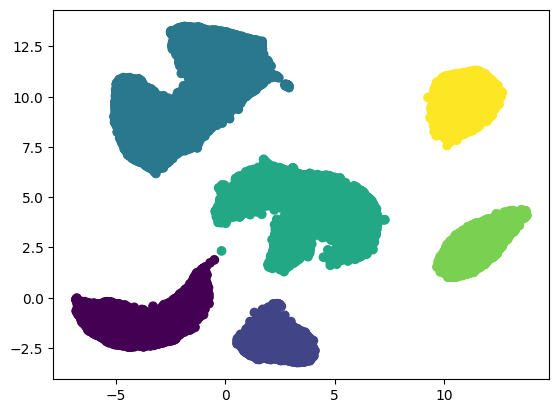

silhouette_score classix_m:  0.6305847
silhouette_score mnist_gt:  0.48737338


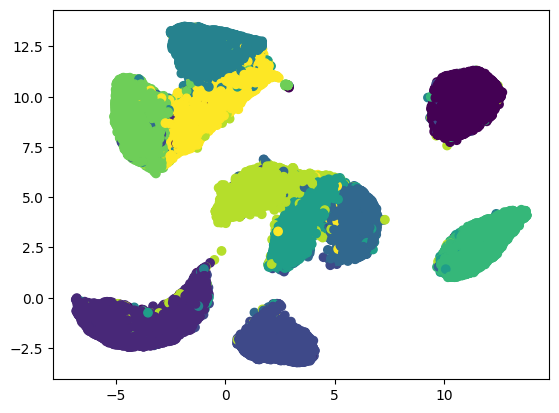

In [14]:
# CLASSIX:

clx_m = CLASSIX_M(radius=0.03, minPts=5, mergeScale=1.4)
st = time.time()
clx_m.fit(x_manhattan)
print("time: ", time.time() - st)
plt.scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=clx_m.labels)
plt.show()
plt.savefig("mnist_manhattan.svg", format='svg')
plt.scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=train_labels)
plt.savefig("mnist_manhattan_gt.svg", format='svg')
print("silhouette_score classix_m: ", silhouette_score(x_manhattan, clx_m.labels))
print("silhouette_score mnist_gt: ", silhouette_score(x_manhattan, train_labels))

time:  0.7462778091430664


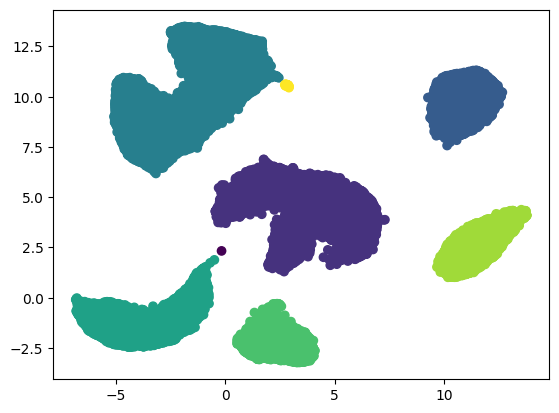

silhouette_score dbscan:  0.42797083


<Figure size 640x480 with 0 Axes>

In [15]:
db = DBSCAN(eps=0.5, min_samples=5, metric='manhattan')
st = time.time()
db.fit(x_manhattan)
print("time: ", time.time() - st)
plt.scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=db.labels_)
plt.show()
plt.savefig("mnist_manhattan_db.svg", format='svg')
print("silhouette_score dbscan: ", silhouette_score(x_manhattan, db.labels_))

time:  25.59981369972229


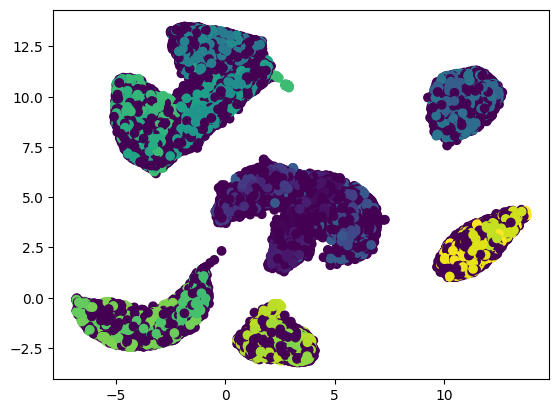

silhouette_score optics:  -0.21662216


<Figure size 640x480 with 0 Axes>

In [20]:
op = OPTICS(max_eps = 1, min_samples=5, metric='manhattan')
st = time.time()
op.fit(x_manhattan)
print("time: ", time.time() - st)
plt.scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=op.labels_)
plt.show()
plt.savefig("mnist_manhattan_op.svg", format='svg')
print("silhouette_score optics: ", silhouette_score(x_manhattan, op.labels_))

In [18]:
print("ARI CLASSIX_M: ", ari(clx_m.labels, train_labels))
print("ARI DBSCAN: ", ari(db.labels_, train_labels))
print("ARI OPTICS: ", ari(op.labels_, train_labels))

ARI CLASSIX_M:  0.5449812233449578
ARI DBSCAN:  0.5450788049046276
ARI OPTICS:  0.00047854557711796787


<Figure size 640x480 with 0 Axes>

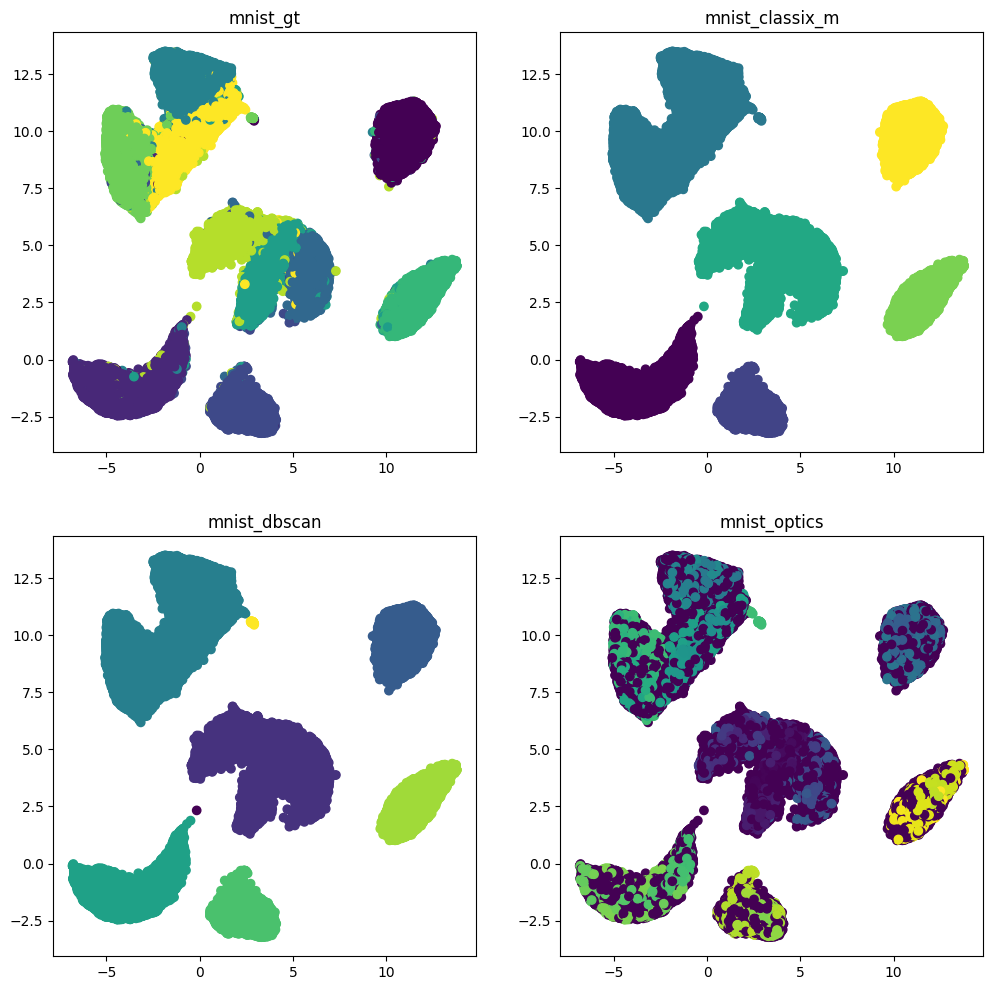

In [22]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=train_labels)
axes[0,0].set_title("mnist_gt")
# axes[0,0].legend()
axes[0,1].scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=clx_m.labels)
axes[0,1].set_title("mnist_classix_m")
# axes[0,1].legend()
axes[1,0].scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=db.labels_)
axes[1,0].set_title("mnist_dbscan")
# axes[1,0].legend()
axes[1,1].scatter(x_manhattan[:, 0], x_manhattan[:, 1], c=op.labels_)
axes[1,1].set_title("mnist_optics")
# axes[1,1].legend()
plt.savefig('mnist_all.svg', format='svg', bbox_inches='tight', dpi=300)